In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
cd /content/gdrive/My Drive/AI LAB 5

/content/gdrive/My Drive/AI LAB 5


In [8]:
import pandas as pd
data = pd.read_csv('Employee-Attrition.csv')
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
data.drop(0,inplace=True)
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

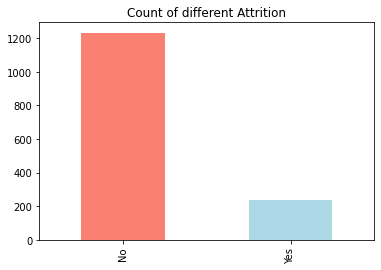

In [ ]:
data['Attrition'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Count of different Attrition")

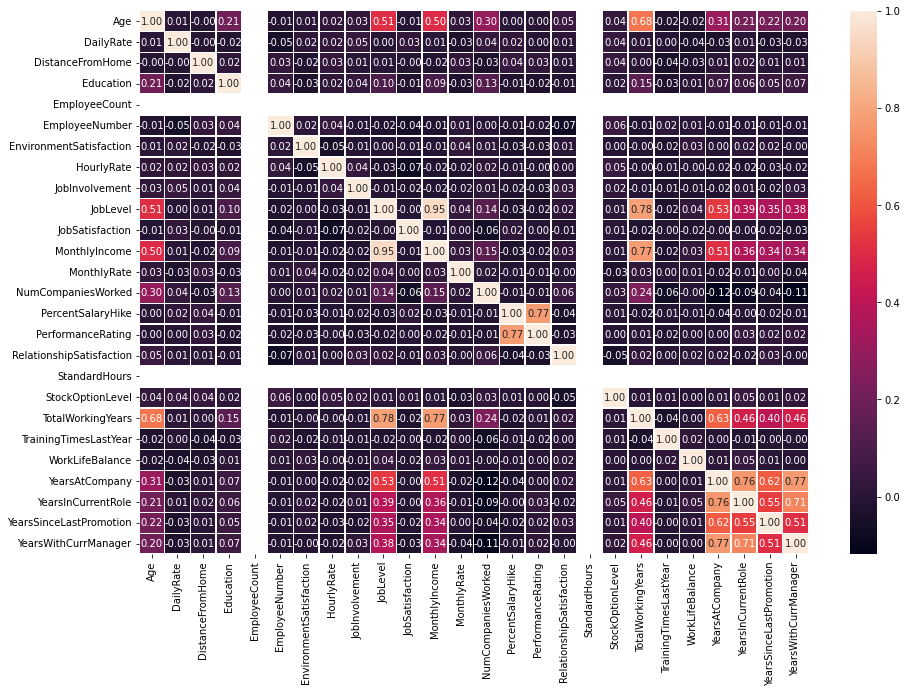

In [ ]:
corr_matrix=data.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f"
              )

In [ ]:
data=data.drop('EmployeeNumber', axis = 1) # A number assignment 
#Remove the column StandardHours
data=data.drop('StandardHours', axis = 1) #Contains only value 80 
#Remove the column EmployeeCount
data=data.drop('EmployeeCount', axis = 1) #Contains only the value 1 
#Remove the column EmployeeCount
data=data.drop('Over18', axis = 1) 

In [ ]:
data.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010438,-0.001380,0.208375,0.010349,0.023883,0.029708,0.509657,-0.005245,0.497923,...,0.002034,0.054066,0.037807,0.680596,-0.018993,-0.020778,0.311383,0.212935,0.216768,0.202032
DailyRate,0.010438,1.000000,-0.004477,-0.016363,0.018695,0.022701,0.045954,0.002996,0.030007,0.007763,...,0.000689,0.008656,0.042635,0.014732,0.003557,-0.036672,-0.033978,0.009966,-0.032897,-0.026493
DistanceFromHome,-0.001380,-0.004477,1.000000,0.020441,-0.016538,0.032114,0.009048,0.005265,-0.002878,-0.017095,...,0.026827,0.005474,0.044259,0.004340,-0.038512,-0.028342,0.009398,0.018808,0.009566,0.014581
Education,0.208375,-0.016363,0.020441,1.000000,-0.027541,0.017631,0.042682,0.101581,-0.010604,0.094921,...,-0.024806,-0.010091,0.017867,0.148073,-0.026468,0.008325,0.069033,0.060214,0.053865,0.069235
EnvironmentSatisfaction,0.010349,0.018695,-0.016538,-0.027541,1.000000,-0.049274,-0.008108,0.001186,-0.006270,-0.006309,...,-0.029746,0.006960,0.003014,-0.002883,-0.020372,0.026566,0.001384,0.017982,0.015893,-0.004889
HourlyRate,0.023883,0.022701,0.032114,0.017631,-0.049274,1.000000,0.042533,-0.027817,-0.072501,-0.015703,...,-0.001772,0.002826,0.051189,-0.001938,-0.006517,-0.002265,-0.019439,-0.024062,-0.026097,-0.020368
JobInvolvement,0.029708,0.045954,0.009048,0.042682,-0.008108,0.042533,1.000000,-0.012616,-0.021785,-0.015244,...,-0.028964,0.034738,0.021771,-0.005425,-0.014801,-0.014002,-0.021314,0.008734,-0.024014,0.025914
JobLevel,0.509657,0.002996,0.005265,0.101581,0.001186,-0.027817,-0.012616,1.000000,-0.001899,0.950301,...,-0.021240,0.021598,0.013951,0.782239,-0.018305,0.037800,0.534738,0.389445,0.353915,0.375298
JobSatisfaction,-0.005245,0.030007,-0.002878,-0.010604,-0.006270,-0.072501,-0.021785,-0.001899,1.000000,-0.007075,...,0.002633,-0.011225,0.011430,-0.019864,-0.004083,-0.017546,-0.003675,-0.002256,-0.017691,-0.027862
MonthlyIncome,0.497923,0.007763,-0.017095,0.094921,-0.006309,-0.015703,-0.015244,0.950301,-0.007075,1.000000,...,-0.017153,0.025779,0.005341,0.772912,-0.021932,0.030564,0.514279,0.363815,0.344983,0.344105


In [ ]:
from sklearn.preprocessing import LabelEncoder

for column in data.columns:
        if data[column].dtype == np.number:
            continue
        data[column] = LabelEncoder().fit_transform(data[column])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  after removing the cwd from sys.path.


In [ ]:
data['Age_Years'] = data['Age']
#Remove the first column called age 
data = data.drop('Age', axis = 1)
#Show the dataframe
data


,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Years
1,0,1,113,1,7,0,1,2,1,31,...,3,1,10,3,2,10,7,1,7,31
2,1,2,804,1,1,1,4,3,1,62,...,1,0,7,3,2,0,0,0,0,19
3,0,1,819,1,2,3,1,3,0,26,...,2,0,8,3,2,8,7,3,0,15
4,0,2,312,1,1,0,3,0,1,10,...,3,1,6,3,2,2,2,2,2,9
5,0,1,572,1,1,1,1,3,1,49,...,2,0,8,2,1,7,7,3,6,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,494,1,22,1,3,2,1,11,...,2,1,17,3,2,5,2,0,3,18
1466,0,2,327,1,5,0,3,3,1,12,...,0,1,9,5,2,7,7,1,7,21
1467,0,2,39,1,3,2,1,1,1,57,...,1,1,6,0,2,6,2,0,3,9
1468,0,1,579,2,1,2,3,3,1,33,...,3,0,17,3,1,9,6,0,8,31


In [9]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder 
from sklearn.tree import DecisionTreeClassifier

cols=data.columns 
le=LabelEncoder() 
data[cols]=data[cols].apply(lambda col: le.fit_transform(col)) 
data
X_tree = data.drop('Attrition',axis=1) 
Y_tree = data['Attrition'] 
X_train, X_test, Y_train, Y_test= train_test_split(X_tree, Y_tree,test_size=0.4, 
random_state=6) 
model_dec = DecisionTreeClassifier() 
model_dec = model_dec.fit(X_train,Y_train) 
Y_pred = model_dec.predict(X_test)

In [10]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(Y_test, Y_pred) 
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 


Accuracy: 0.79421768707483


In [11]:
model_dec = DecisionTreeClassifier(criterion='gini',max_depth=6) 
model_dec1 = model_dec.fit(X_train,Y_train) 
Y_pred = model_dec.predict(X_test) 
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 


Accuracy: 0.8418367346938775


In [12]:
X = data.iloc[:, 1:data.shape[1]].values 
Y = data.iloc[:, 0].values

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [14]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini',splitter='best',random_state=2)
dt.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=2)

In [15]:
dt.score(X_train, Y_train)

1.0

In [16]:
dt.score(X_test,Y_test)

0.059782608695652176

In [17]:
dtn = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=9,random_state=2)
dtn.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=9, random_state=2)

In [19]:
dtn.score(X_train, Y_train)

0.4646098003629764

In [20]:
dtn.score(X_test,Y_test)

0.06521739130434782

In [21]:
dtl = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=9,min_samples_leaf=2,random_state=2)
dtl.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=2, random_state=2)

In [22]:
dtl.score(X_train, Y_train)

0.426497277676951

In [23]:
dtl.score(X_test,Y_test)

0.06521739130434782